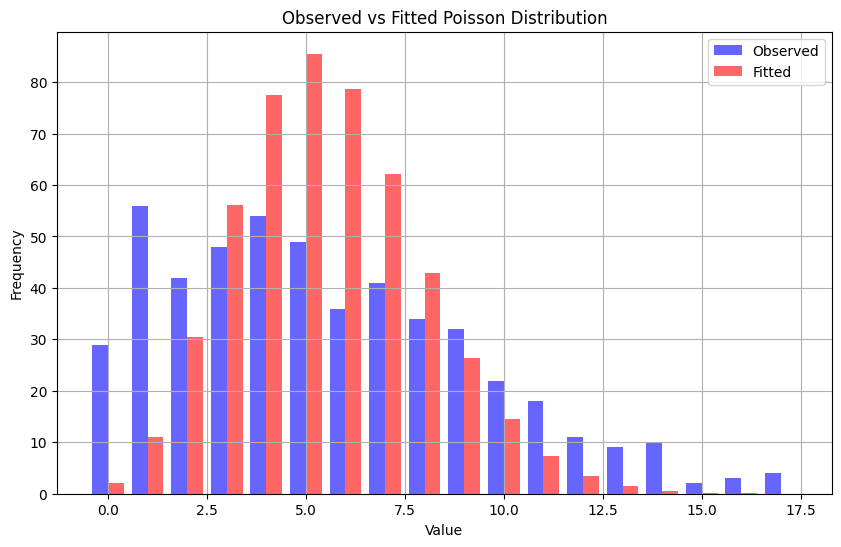

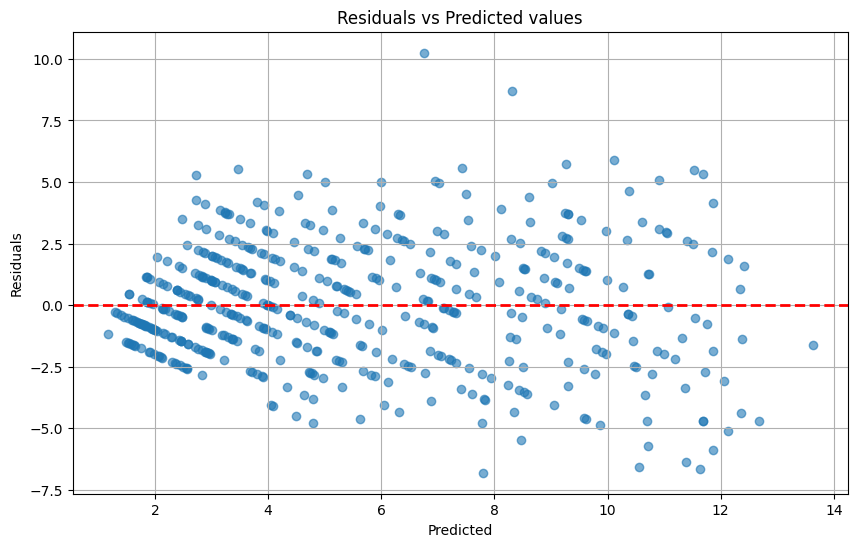

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson

# 读取数据
data = pd.read_csv("C:/Users/Admin/PycharmProjects/pythonProject1/sparse_matrix_with_y.csv")
X = data.iloc[:, :-1]  # 特征矩阵
y = data.iloc[:, -1]   # 响应变量

# 添加截距项
X = sm.add_constant(X)

# 拟合泊松回归模型
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# 预测值
y_pred = poisson_model.predict(X)

# 计算观测值的频率
observed_counts = np.bincount(y)
observed = pd.Series(observed_counts, index=np.arange(len(observed_counts)))

# 计算拟合的泊松概率和频率
lambda_fit = np.mean(y_pred)
fitted_probs = poisson.pmf(np.arange(len(observed_counts)), lambda_fit)
fitted = fitted_probs * len(y)

# 准备绘图数据
plot_data = pd.DataFrame({
    'value': np.arange(len(observed)),
    'observed': observed,
    'fitted': fitted
})

# 使用 Matplotlib 进行绘图
plt.figure(figsize=(10, 6))
plt.bar(plot_data['value'] - 0.2, plot_data['observed'], width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(plot_data['value'] + 0.2, plot_data['fitted'], width=0.4, label='Fitted', color='red', alpha=0.6)
plt.title('Observed vs Fitted Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

residuals = y - y_pred

# 绘制残差图
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.grid(True)
plt.show()

            0            1            2            3            4            5
count  1000.0  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      1.0     0.496372     0.500085     0.489858     0.497802     0.500044
std       0.0     0.290317     0.297097     0.285003     0.287006     0.289057
min       1.0     0.000227     0.000031     0.000012     0.000943     0.000135
25%       1.0     0.249803     0.233539     0.237326     0.257741     0.241764
50%       1.0     0.485076     0.508614     0.500180     0.493386     0.511011
75%       1.0     0.752478     0.761016     0.731520     0.745849     0.738501
max       1.0     0.996158     0.999718     0.998893     0.996334     0.999558
count    1000.000000
mean        4.579000
std         2.885149
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        21.000000
dtype: float64


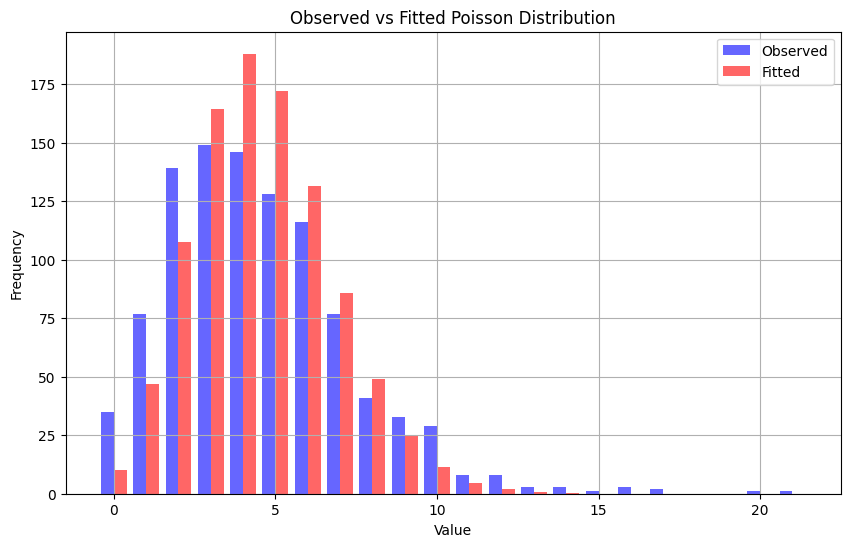

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import poisson

# 生成数据示例
def generate_poisson_data(n_samples, n_features):
    np.random.seed(42)
    X = np.random.rand(n_samples, n_features)
    beta = np.random.rand(n_features)
    lambda_ = np.exp(np.dot(X, beta))
    y = np.random.poisson(lambda_)
    return X, y

# 生成示例数据
n_samples = 1000
n_features = 5
X, y = generate_poisson_data(n_samples, n_features)

# 将X转换为DataFrame并添加截距项
X = sm.add_constant(X)

# 检查生成的数据
print(pd.DataFrame(X).describe())
print(pd.Series(y).describe())

# 拟合泊松回归模型
poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()

# 预测值
y_pred = poisson_model.predict(X)

# 计算观测值的频率
observed_counts = np.bincount(y)
observed = pd.Series(observed_counts, index=np.arange(len(observed_counts)))

# 计算拟合的泊松概率和频率
lambda_fit = np.mean(y_pred)
fitted_probs = poisson.pmf(np.arange(len(observed_counts)), lambda_fit)
fitted = fitted_probs * len(y)

# 准备绘图数据
plot_data = pd.DataFrame({
    'value': np.arange(len(observed)),
    'observed': observed,
    'fitted': fitted
})

# 使用 Matplotlib 进行绘图
plt.figure(figsize=(10, 6))
plt.bar(plot_data['value'] - 0.2, plot_data['observed'], width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(plot_data['value'] + 0.2, plot_data['fitted'], width=0.4, label='Fitted', color='red', alpha=0.6)
plt.title('Observed vs Fitted Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


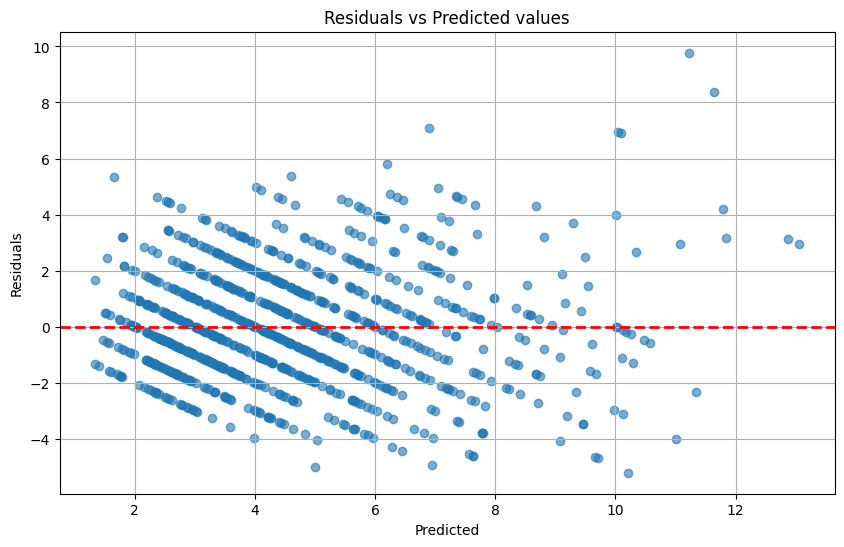

Dataset 1 - MSE: 4.1318490983025935, MAE: 1.595065790249192


In [14]:
# 计算残差
residuals = y - y_pred

# 绘制残差图
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.grid(True)
plt.show()
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse1 = mean_squared_error(y, y_pred)
mae1 = mean_absolute_error(y, y_pred)
print(f"Dataset 1 - MSE: {mse1}, MAE: {mae1}")


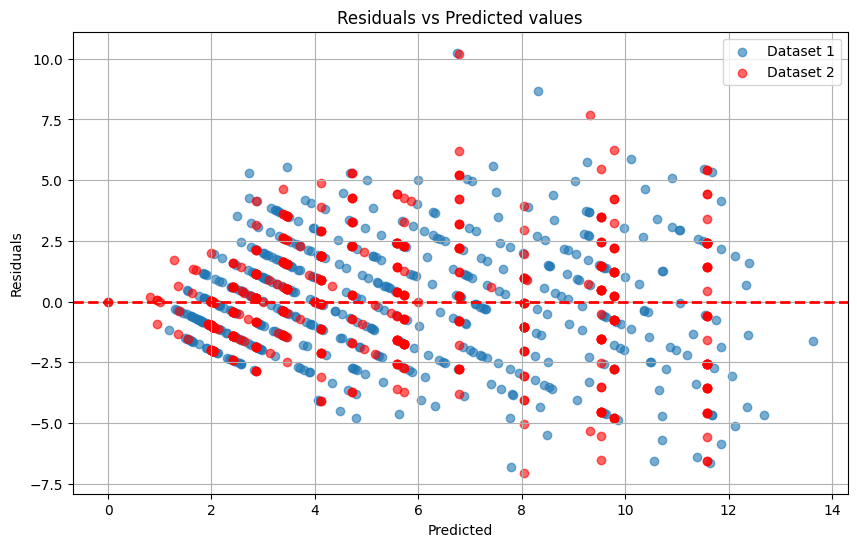

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import poisson

# 读取第一个数据集
data1 = pd.read_csv("C:/Users/Admin/PycharmProjects/pythonProject1/sparse_matrix_with_y.csv")
X1 = data1.iloc[:, :-1]  # 特征矩阵
y1 = data1.iloc[:, -1]   # 响应变量

# 读取第二个数据集
data2 = pd.read_csv("C:/Users/Admin/PycharmProjects/pythonProject1/Newfeatures.csv")  # 假设文件名为Otherfeatures.csv
X2 = data2.iloc[:, :-1]  # 特征矩阵
y2 = data2.iloc[:, -1]   # 响应变量

# 添加截距项
X1 = sm.add_constant(X1)
X2 = sm.add_constant(X2)

# 拟合泊松回归模型
poisson_model1 = sm.GLM(y1, X1, family=sm.families.Poisson()).fit()
poisson_model2 = sm.GLM(y2, X2, family=sm.families.Poisson()).fit()

# 预测值
y_pred1 = poisson_model1.predict(X1)
y_pred2 = poisson_model2.predict(X2)

# 计算残差
residuals1 = y1 - y_pred1
residuals2 = y2 - y_pred2

# 绘制残差图
plt.figure(figsize=(10, 6))
plt.scatter(y_pred1, residuals1, alpha=0.6, label='Dataset 1')
plt.scatter(y_pred2, residuals2, alpha=0.6, label='Dataset 2', color='red')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.legend()
plt.grid(True)
plt.show()


In [27]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
mse1 = mean_squared_error(y1, y_pred1)
mae1 = mean_absolute_error(y1, y_pred1)
mse2 = mean_squared_error(y2, y_pred2)
mae2 = mean_absolute_error(y2, y_pred2)
print(f"Dataset 1 - MSE: {mse1}, MAE: {mae1}")
print(f"Dataset 2 - MSE: {mse2}, MAE: {mae2}")

Dataset 1 - MSE: 6.05991742177547, MAE: 1.9586365577006217
Dataset 2 - MSE: 5.637330995544145, MAE: 1.8393156117947562


In [17]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
data = pd.read_csv("C:/Users/Admin/PycharmProjects/pythonProject1/sparse_matrix_with_y.csv")
# 假设你的数据集已经加载到 data 变量中
# 请将下面的特征名替换为你数据集中的实际特征名
# 假设响应变量为 'response'，特征包括 'feature1', 'feature2', ..., 'featureN'

# 将数据集中的所有列转换为数值类型，并处理缺失值和无限值
df = pd.DataFrame(X, columns=[f'feature{i}' for i in range(n_features)])
df['y'] = y

# 拟合泊松回归模型
formula = 'y ~ ' + ' + '.join(df.columns[:-1])
poisson_model = smf.poisson(formula, data=df).fit()

# 显示模型摘要
print(poisson_model.summary())

# 预测值
df['y_pred'] = poisson_model.predict(df)

# 计算观测值的频率
observed_counts = np.bincount(y)
observed = pd.Series(observed_counts, index=np.arange(len(observed_counts)))

# 计算拟合的泊松概率和频率
lambda_fit = np.mean(df['y_pred'])
fitted_probs = poisson.pmf(np.arange(len(observed_counts)), lambda_fit)
fitted = fitted_probs * len(y)

# 准备绘图数据
plot_data = pd.DataFrame({
    'value': np.arange(len(observed)),
    'observed': observed,
    'fitted': fitted
})

# 使用 Matplotlib 进行绘图
plt.figure(figsize=(10, 6))
plt.bar(plot_data['value'] - 0.2, plot_data['observed'], width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(plot_data['value'] + 0.2, plot_data['fitted'], width=0.4, label='Fitted', color='red', alpha=0.6)
plt.title('Observed vs Fitted Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()



PatsyError: numbers besides '0' and '1' are only allowed with **
    y ~ 0 + 1 + 2 + 3 + 4 + 5 + 6 + 7 + 8 + 9 + 10 + 11 + 12 + 13 + 14 + 15 + 16 + 17 + 18 + 19 + 20 + 21 + 22 + 23 + 24 + 25 + 26 + 27 + 28 + 29 + 30 + 31 + 32 + 33 + 34 + 35 + 36 + 37 + 38 + 39
                ^

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import poisson

# 生成数据示例
data = pd.read_csv("C:/Users/Admin/PycharmProjects/pythonProject1/sparse_matrix_with_y.csv")

# 将X和y转换为DataFrame
df = pd.DataFrame(X, columns=[f'i' for i in range(40)])
df['y'] = y

# 拟合泊松回归模型
formula = 'y ~ ' + ' + '.join(df.columns[:-1])
poisson_model = smf.poisson(formula, data=df).fit()

# 显示模型摘要
print(poisson_model.summary())

# 预测值
df['y_pred'] = poisson_model.predict(df)

# 计算观测值的频率
observed_counts = np.bincount(y)
observed = pd.Series(observed_counts, index=np.arange(len(observed_counts)))

# 计算拟合的泊松概率和频率
lambda_fit = np.mean(df['y_pred'])
fitted_probs = poisson.pmf(np.arange(len(observed_counts)), lambda_fit)
fitted = fitted_probs * len(y)

# 准备绘图数据
plot_data = pd.DataFrame({
    'value': np.arange(len(observed)),
    'observed': observed,
    'fitted': fitted
})

# 使用 Matplotlib 进行绘图
plt.figure(figsize=(10, 6))
plt.bar(plot_data['value'] - 0.2, plot_data['observed'], width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(plot_data['value'] + 0.2, plot_data['fitted'], width=0.4, label='Fitted', color='red', alpha=0.6)
plt.title('Observed vs Fitted Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


ValueError: Shape of passed values is (1000, 5), indices imply (1000, 40)

   feature_itemset_0  feature_itemset_1  feature_itemset_2  feature_itemset_3  \
0                  0                  0                  0                  0   
1                  1                  1                  1                  1   
2                  1                  1                  1                  1   
3                  1                  1                  1                  1   
4                  1                  1                  1                  1   

   feature_itemset_4  feature_itemset_5  feature_itemset_6  feature_itemset_7  \
0                  1                  1                  1                  1   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  1                  1                  1                  1   
4                  0                  0                  0                  0   

   feature_itemset_8  feat

C:\Users\Admin\PycharmProjects\pythonProject1\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


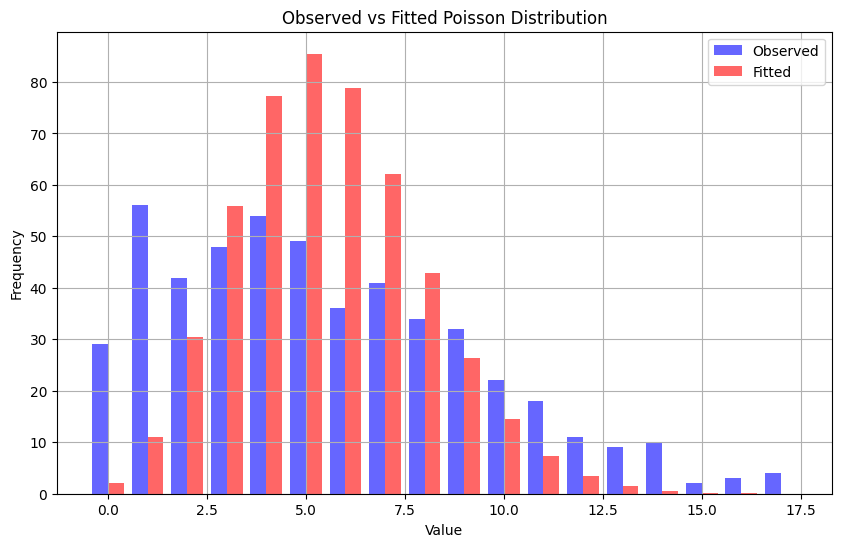

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import poisson

# 加载数据
data = pd.read_csv("C:/Users/Admin/PycharmProjects/pythonProject1/Newfeatures.csv")

# 将列名从纯数字改为字符串形式
data.columns = [f'feature_{i}' if i != 'y' else 'y' for i in data.columns]

# 检查数据
print(data.head())

# 拟合泊松回归模型
formula = 'y ~ ' + ' + '.join(data.columns[:-1])
poisson_model = smf.poisson(formula, data=data).fit()

# 显示模型摘要
print(poisson_model.summary())

# 预测值
data['y_pred'] = poisson_model.predict(data)

# 计算观测值的频率
observed_counts = np.bincount(data['y'])
observed = pd.Series(observed_counts, index=np.arange(len(observed_counts)))

# 计算拟合的泊松概率和频率
lambda_fit = np.mean(data['y_pred'])
fitted_probs = poisson.pmf(np.arange(len(observed_counts)), lambda_fit)
fitted = fitted_probs * len(data)

# 准备绘图数据
plot_data = pd.DataFrame({
    'value': np.arange(len(observed)),
    'observed': observed,
    'fitted': fitted
})

# 使用 Matplotlib 进行绘图
plt.figure(figsize=(10, 6))
plt.bar(plot_data['value'] - 0.2, plot_data['observed'], width=0.4, label='Observed', color='blue', alpha=0.6)
plt.bar(plot_data['value'] + 0.2, plot_data['fitted'], width=0.4, label='Fitted', color='red', alpha=0.6)
plt.title('Observed vs Fitted Poisson Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from scipy.stats import poisson

# 生成第一个数据集
np.random.seed(42)
n_samples1 = 365  # 假设一年有365天
weather1 = np.random.choice(['sunny', 'rainy', 'snowy'], n_samples1, p=[0.7, 0.2, 0.1])
traffic_flow1 = np.random.normal(100, 10, n_samples1)
accidents1 = np.random.poisson(lam=(traffic_flow1 / 10))

data1 = pd.DataFrame({
    'weather': weather1,
    'traffic_flow': traffic_flow1,
    'accidents': accidents1
})
data1 = pd.get_dummies(data1, columns=['weather'], drop_first=True)

# 生成第二个数据集（不同的分布）
np.random.seed(24)
n_samples2 = 365
weather2 = np.random.choice(['sunny', 'rainy', 'snowy'], n_samples2, p=[0.6, 0.3, 0.1])
traffic_flow2 = np.random.normal(120, 15, n_samples2)
accidents2 = np.random.poisson(lam=(traffic_flow2 / 12))

data2 = pd.DataFrame({
    'weather': weather2,
    'traffic_flow': traffic_flow2,
    'accidents': accidents2
})
data2 = pd.get_dummies(data2, columns=['weather'], drop_first=True)

# 拟合第一个数据集的泊松回归模型
formula1 = 'accidents ~ traffic_flow + weather_rainy + weather_snowy'
poisson_model1 = smf.poisson(formula1, data=data1).fit()

# 拟合第二个数据集的泊松回归模型
formula2 = 'accidents ~ traffic_flow + weather_rainy + weather_snowy'
poisson_model2 = smf.poisson(formula2, data=data2).fit()

# 预测值
data1['predicted_accidents'] = poisson_model1.predict(data1)
data2['predicted_accidents'] = poisson_model2.predict(data2)

# 计算残差
data1['residuals'] = data1['accidents'] - data1['predicted_accidents']
data2['residuals'] = data2['accidents'] - data2['predicted_accidents']

# 绘制残差图
plt.figure(figsize=(12, 8))
plt.scatter(data1['predicted_accidents'], data1['residuals'], alpha=0.6, label='Dataset 1', color='blue')
plt.scatter(data2['predicted_accidents'], data2['residuals'], alpha=0.6, label='Dataset 2', color='red')
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted values')
plt.legend()
plt.grid(True)
plt.show()


PatsyError: Error evaluating factor: NameError: name 'weather_rainy' is not defined
    accidents ~ traffic_flow + weather_rainy + weather_snowy
                               ^^^^^^^^^^^^^

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\mnt\\data\\poisson_link_function.png'

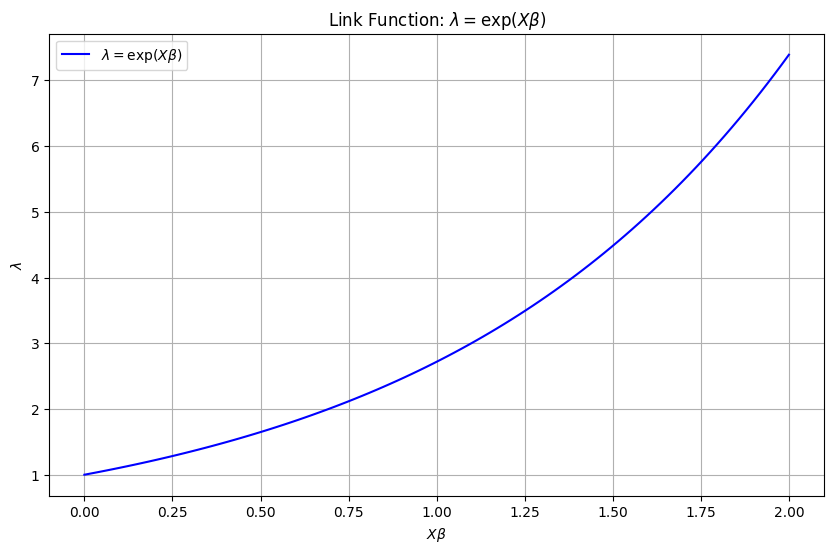

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# 生成数据
X_beta = np.linspace(0, 2, 100)
lambda_exp = np.exp(X_beta)

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(X_beta, lambda_exp, label=r'$\lambda = \exp(X\beta)$', color='b')
plt.xlabel(r'$X\beta$')
plt.ylabel(r'$\lambda$')
plt.title(r'Link Function: $\lambda = \exp(X\beta)$')
plt.legend()
plt.grid(True)

# 保存图表
plt.savefig('/mnt/data/poisson_link_function.png')
plt.show()


In [35]:
import numpy as np
from sklearn.linear_model import PoissonRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 设置随机种子
np.random.seed(42)

# 生成特征矩阵（稀疏矩阵）
n_samples = 100
n_features = 20
X = np.random.poisson(0.1, (n_samples, n_features))

# 生成系数向量
true_beta = np.random.randn(n_features)

# 引入特征之间的非线性关系
nonlinear_transform = lambda x: np.log1p(x) + np.sin(x)
X_nonlinear = nonlinear_transform(X)

# 生成响应变量
y = np.random.poisson(np.exp(np.dot(X_nonlinear, true_beta)))

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_nonlinear, y, test_size=0.2, random_state=42)

# 使用LCM提取特征集（示例代码，假设LCM结果保存在new_features_matrix中）
# 这里的new_features_matrix应从LCM提取结果中获取
new_features_matrix = X_nonlinear  # 仅作示例，实际应使用LCM结果

# 使用正则化路径进行泊松回归
model = make_pipeline(StandardScaler(), PoissonRegressor(alpha=1.0))
model.fit(new_features_matrix, y_train)

# 预测并评估模型
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)


ValueError: Found input variables with inconsistent numbers of samples: [100, 80]